In [536]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [537]:
train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])

9999

In [538]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [539]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Model without regularization and dropout (two layers and 16 units)

In [540]:
x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential([
layers.Dense(16, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

In [541]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5248 - accuracy: 0.7795 - val_loss: 0.4087 - val_accuracy: 0.8561
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3216 - accuracy: 0.8988 - val_loss: 0.3233 - val_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2346 - accuracy: 0.9246 - val_loss: 0.2863 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1869 - accuracy: 0.9403 - val_loss: 0.2798 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1491 - accuracy: 0.9514 - val_loss: 0.2823 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1238 - accuracy: 0.9622 - val_loss: 0.2918 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1022 - accuracy: 0.9697 - val_loss: 0.3081 - val_accuracy: 0.8842
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

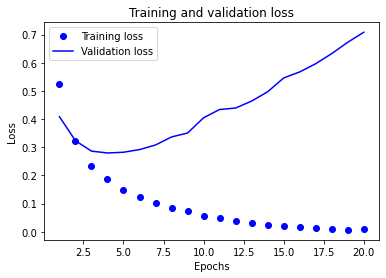

In [542]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

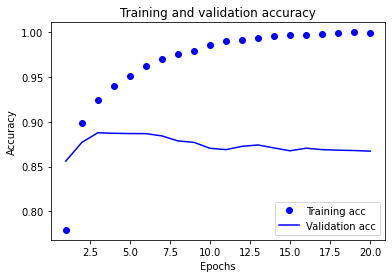

In [543]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [544]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4600 - accuracy: 0.8224
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2600 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1968 - accuracy: 0.9309
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3028 - accuracy: 0.8802


In [545]:
results


[0.30282720923423767, 0.8801599740982056]

In [546]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.13362178],
       [0.9999358 ],
       [0.8142355 ],
       ...,
       [0.11238768],
       [0.07526967],
       [0.59572256]], dtype=float32)

## Model with 1 layer and 16 units

In [547]:
x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
one_layer_model = keras.Sequential([
layers.Dense(16, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

In [548]:
one_layer_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = one_layer_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5218 - accuracy: 0.7989 - val_loss: 0.4176 - val_accuracy: 0.8649
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3456 - accuracy: 0.8959 - val_loss: 0.3419 - val_accuracy: 0.8788
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2676 - accuracy: 0.9176 - val_loss: 0.3029 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2197 - accuracy: 0.9304 - val_loss: 0.2913 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1863 - accuracy: 0.9427 - val_loss: 0.3140 - val_accuracy: 0.8720
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1631 - accuracy: 0.9496 - val_loss: 0.2747 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1424 - accuracy: 0.9577 - val_loss: 0.2807 - val_accuracy: 0.8877
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

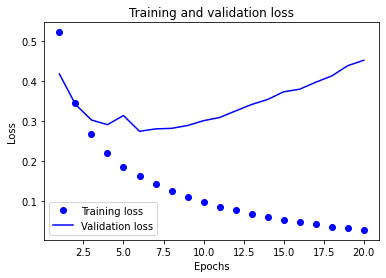

In [549]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

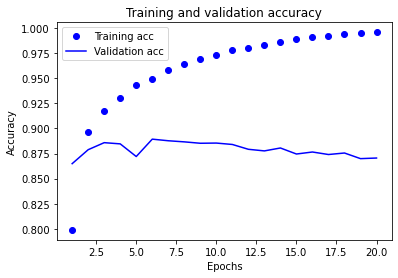

In [550]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [551]:
one_layer_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
one_layer_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
one_layer_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = one_layer_model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4362 - accuracy: 0.8267
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2635 - accuracy: 0.9101
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2112 - accuracy: 0.9274
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.8821


In [552]:
results


[0.2894096374511719, 0.8820800185203552]

In [553]:
one_layer_model.predict(x_test)

782/782 [==============================] - 4s 2ms/step


array([[0.21258551],
       [0.99986017],
       [0.7626054 ],
       ...,
       [0.12269194],
       [0.07010791],
       [0.5027433 ]], dtype=float32)

## Model with 2 layers and 8 units

In [554]:
x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
two_layer_model = keras.Sequential([
layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

In [555]:
two_layer_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = two_layer_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5377 - accuracy: 0.7990 - val_loss: 0.4396 - val_accuracy: 0.8463
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3568 - accuracy: 0.8952 - val_loss: 0.3422 - val_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2698 - accuracy: 0.9191 - val_loss: 0.2993 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2172 - accuracy: 0.9318 - val_loss: 0.2804 - val_accuracy: 0.8928
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1820 - accuracy: 0.9439 - val_loss: 0.2769 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1524 - accuracy: 0.9539 - val_loss: 0.2826 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1302 - accuracy: 0.9615 - val_loss: 0.2808 - val_accuracy: 0.8874
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

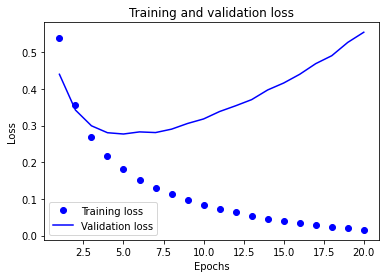

In [556]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

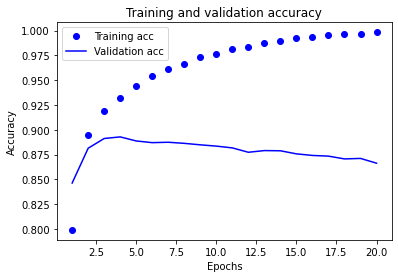

In [557]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [558]:
two_layer_model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
two_layer_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
two_layer_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = two_layer_model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4891 - accuracy: 0.8089
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2940 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2259 - accuracy: 0.9235
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2789 - accuracy: 0.8885


In [559]:
results


[0.27887991070747375, 0.8885200023651123]

In [560]:
two_layer_model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.25776833],
       [0.9990936 ],
       [0.88385576],
       ...,
       [0.12468589],
       [0.10749827],
       [0.69904345]], dtype=float32)

## Handling overfit by regularization and dropout


In [561]:
regular_model = keras.Sequential([
layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'),
    layers.Dropout(0.5),
layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'),
    layers.Dropout(0.5),
layers.Dense(1, activation='sigmoid')
])

In [562]:
regular_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = regular_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6587 - accuracy: 0.6572 - val_loss: 0.5531 - val_accuracy: 0.8571
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5423 - accuracy: 0.7804 - val_loss: 0.4484 - val_accuracy: 0.8647
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4698 - accuracy: 0.8263 - val_loss: 0.3902 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4116 - accuracy: 0.8638 - val_loss: 0.3540 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3705 - accuracy: 0.8869 - val_loss: 0.3351 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3350 - accuracy: 0.9009 - val_loss: 0.3295 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3098 - accuracy: 0.9153 - val_loss: 0.3346 - val_accuracy: 0.8853
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

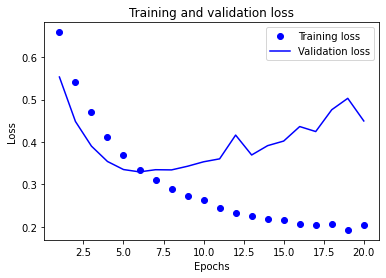

In [563]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

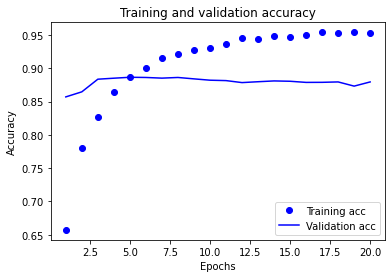

In [564]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [565]:
regular_model = keras.Sequential([
layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'),
    layers.Dropout(0.5),
layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'),
    layers.Dropout(0.5),
layers.Dense(1, activation='sigmoid')
])
regular_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
regular_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = regular_model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.6319 - accuracy: 0.6728
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4866 - accuracy: 0.8177
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4108 - accuracy: 0.8651
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3278 - accuracy: 0.8876


In [566]:
results


[0.32776084542274475, 0.8875600099563599]

In [567]:
regular_model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.19485652],
       [0.99838173],
       [0.8682812 ],
       ...,
       [0.14168696],
       [0.16209662],
       [0.41642684]], dtype=float32)